In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load your dataset
df = pd.read_csv("/content/heart.csv")


In [3]:
# Basic preprocessing
X = df.drop("target", axis=1)
y = df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Train model
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Visualize tree
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=["No", "Yes"],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=True)


Decision Tree Accuracy: 0.9853658536585366


'decision_tree.pdf'

In [5]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pruned_pred = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pruned_pred))


Pruned Decision Tree Accuracy: 0.8


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))


Random Forest Accuracy: 0.9853658536585366


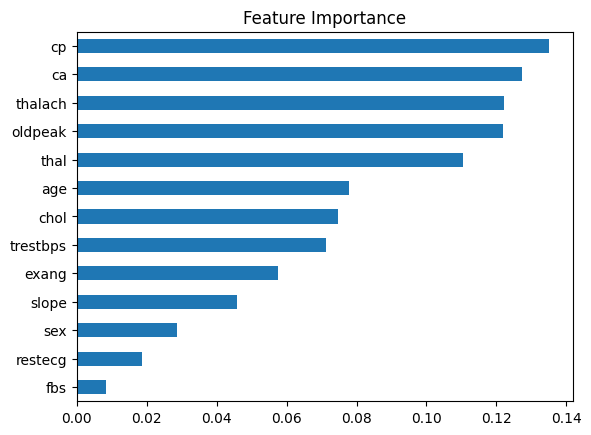

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind="barh", title="Feature Importance")
plt.show()


In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9970731707317073
